<a href="https://colab.research.google.com/github/rociovald/GEOG5990M_Final/blob/main/Accidents%20Antofagasta%2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages and libraries**

In [114]:
##  The following packages are installed  #ESTO LO SAQUÉ EL ASSIGNMNET 1
!pip install contextily  # This installs the contextily library.  It is helpful for displaying geographic data on maps.
!pip install geoplot     # This installs the geoplot library. It is useful for working with geospatial data, in maps and data visualisation.
!pip install git+https://github.com/pmdscully/geo_northarrow.git   # This installs the geo_northarrow library which connects to a GitHub repository containing north arrows.
!pip install folium
!pip install h3
!pip install geoplot


  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-9q01y543
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-9q01y543
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.3 MB/s eta 0:00:00


In [115]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")


## Now the libraries are called up

import pyproj
import contextily as ctx


import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow

from matplotlib import colors  # is used to extract a subset of a colourmap as a new colourmap in matplotlib (in visualisation)

import h3
from shapely.geometry import Point, Polygon
import folium

In [60]:
#from google.colab import drive
#drive.mount('/content/drive')

In [61]:
## Read in the spatial dataframe

# Read 3 geojson:

gdfs_2019 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2019.geojson')
gdfs_2020 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2020.geojson')
gdfs_2021 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2021.geojson')
gdfs_2022 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2022.geojson')


#gdfs_2019 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2019.geojson')
#gdfs_2020 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2020.geojson')
#gdfs_2021 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2021.geojson')
#gdfs_2022 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2022.geojson')



**Information on geojson**

gdfs_2019 =

gdfs_2020 =

gdfs_2021 =

gdfs_2022 =


# **Data-preprocessing and data exploration**

In [62]:
gdfs_2019.sample(2)

,FID,Ano,Idaccident,Codregion,Region,Comuna,Zona,Calle1,Calle2,Numero,...,Estado_Cal,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,geometry
674,675,2019,1188896,2,REGION ANTOFAGASTA,CALAMA,URBANA,ALEJANDRO RODRIGUEZ,GRANADEROS,NULL,...,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,POINT (-68.92649 -22.43941)
1736,1737,2019,1250206,2,REGION ANTOFAGASTA,ANTOFAGASTA,URBANA,COVADONGA NUEVA,,1369,...,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,POINT (-70.38754 -23.65)


In [63]:
gdfs_2020.sample(2)

,FID,COD_REG,REGION,CUT,COMUNA,CALLE_UNO,CALLE_DOS,NUMERO,DIR_GEOCOD,LAT,...,Tipo_Accid,Tipo__CONA,Zona,Causa__CON,Causa,Fallecidos,Graves,Menos_Grav,Leves,geometry
1170,1171,2,REGION ANTOFAGASTA,2101,ANTOFAGASTA,ANTONIO RENDIC,,6931,"Av. Antonio Rendic 6931, Antofagasta, Chile",-23.608339,...,COLISION LATERAL,COLISION,URBANA,IMPRUDENCIA DEL CONDUCTOR,ADELANTAMIENTO SOBREPASANDO LINEA CONTINUA,0,0,0,1,POINT (-70.3856 -23.60834)
1404,1405,2,REGION ANTOFAGASTA,2201,CALAMA,LLANTEN,LAS VEGAS,0,"Llantén & Las Vegas, Calama, Antofagasta, Chile",-22.473813,...,COLISION,COLISION,URBANA,IMPRUDENCIA DEL CONDUCTOR,CONDUCCION NO ATENTO CONDICIONES TRANSITO MOMENTO,0,0,0,0,POINT (-68.93606 -22.47381)


In [64]:
gdfs_2021.sample(2)

,FID,FID_1,LABELID,POINT_X,POINT_Y,FID_2,COMUNAREAL,VAL_COM,OBJECTID,A_O,...,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,geometry
908,909,1808,1346730,-70.382736,-23.628514,229,ANTOFAGASTA,1,16149,2021,...,1,SECO,1,DESPEJADO,1,0,0,0,1,POINT (-70.38274 -23.62851)
1604,1605,4513,1405982,-68.928321,-22.448193,111,CALAMA,1,56498,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (-68.92832 -22.44819)


In [65]:
gdfs_2022.sample(2)

,FID,POINT_X,POINT_Y,Idaccident,Año,Claseaccid,Fecha,Cód_Regi,Región,Cód_Comun,...,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,geometry
1857,1858,-70.42465,-23.705720,1437931,2022,1,2022-04-20 00:00:00+00:00,2,REGION ANTOFAGASTA,2101,...,1,SECO,1,DESPEJADO,0,1,0,0,1,POINT (-70.42465 -23.70572)
2226,2227,-68.93596,-22.444307,1496717,2022,1,2022-12-17 00:00:00+00:00,2,REGION ANTOFAGASTA,2201,...,1,SECO,1,DESPEJADO,0,0,0,5,1,POINT (-68.93596 -22.44431)


The 3 geojson contain the following attributes:


*   'FID':
*   'POINT_X':
......




*Coordinate Reference Systems (CRS)*

Antes de visualizar las capas, es fundamental asegurarse de que todas utilicen el mismo sistema de coordenadas. En este caso, emplearemos un sistema de coordenadas proyectadas, específicamente WGS 1984 UTM 19S, que permite realizar geoprocesamiento utilizando medidas en metros.

In [66]:
# Using the crs method it is possible to visualise the coordinate reference system that the layer has.
gdfs_2019.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Las coordenadas se encuentran en latitud y longitud, pr lo que es necesario proyectarlas a WGS 1984 UTM 19S, EPSG:32719

In [67]:
gdfs_2019_utm = gdfs_2019.to_crs(epsg=32719)
gdfs_2019_utm.crs # Check that the change has been made

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
gdfs_2020.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Al igual que geojson anterior, las coordenadas se encuentran en latitud y longitud, por lo que es necesario proyectarlas a WGS 1984 UTM 19S, EPSG:32719

In [69]:
gdfs_2020_utm = gdfs_2020.to_crs(epsg=32719)
gdfs_2020_utm.crs # Check that the change has been made

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [70]:
gdfs_2021.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Al igual que geojson anterior, las coordenadas se encuentran en latitud y longitud, por lo que es necesario proyectarlas a WGS 1984 UTM 19S, EPSG:32719

In [71]:
gdfs_2021_utm = gdfs_2021.to_crs(epsg=32719)
gdfs_2021_utm.crs # Check that the change has been made

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
gdfs_2022.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Al igual que geojson anterior, las coordenadas se encuentran en latitud y longitud, por lo que es necesario proyectarlas a WGS 1984 UTM 19S, EPSG:32719

In [73]:
gdfs_2022_utm = gdfs_2022.to_crs(epsg=32719)
gdfs_2022_utm.crs # Check that the change has been made

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [74]:
# check the row and column of dataframe
gdfs_2019_utm.shape

(2494, 44)

In [75]:
# check the row and column of dataframe
gdfs_2020_utm.shape

(1951, 26)

In [76]:
# check the row and column of dataframe
gdfs_2021_utm.shape

(2416, 70)

In [77]:
# check the row and column of dataframe
gdfs_2022_utm.shape

(2366, 50)

La cantidad de filas y columnas son iguales en los gdfs_2019 y 2022, mientras que son distintos en los gdfs_2020 y gdfs_2021.

Respecto a la transformación al CRS: EPSG:32719. Después descubrí que una manera más eficiente de haberlos transformado, es la siguiente:


gdfs = [gdfs_2019, gdfs_2020, gdfs_2021, gdfs_2022]

gdfs_utm = [gdf.to_crs(epsg=32719) for gdf in gdfs]
gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm = gdfs_utm

for gdf in gdfs_utm:
    print(gdf.crs)




In [78]:
# Summary statistics
gdfs_2019_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

,FID,Ano,Idaccident,Codregion,lat,lng,Claseaccid,Cód_Comun,Cód_Tipo_,Cód_Tipo1,...,Pistas_de1,Cód_Calza,Cód__Tipo,Cód_Estad,Cód_Condi,Cód_Est_1,Fallecidos,Graves,Menos_Grav,Leves
count,2494.000000,2494.0,2.494000e+03,2494.0,2494.000000,2494.000000,2494.0,2494.000000,2494.000000,2494.000000,...,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000
mean,1247.500000,2019.0,1.207710e+06,2.0,-23.290205,-69.708245,1.0,2132.881716,38.676824,31.978348,...,1.046111,1.813152,2.011628,1.026464,1.002406,1.009222,0.006415,0.062951,0.032879,0.455493
std,720.100109,0.0,2.647246e+04,0.0,0.584246,6.250235,0.0,51.340928,16.887152,10.228140,...,0.870172,0.698095,0.283708,0.165463,0.113270,0.107459,0.084729,0.255793,0.182798,0.865286
min,1.000000,2019.0,1.158087e+06,2.0,-25.412882,-70.488785,1.0,2101.000000,10.000000,10.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,624.250000,2019.0,1.185442e+06,2.0,-23.647045,-70.396347,1.0,2101.000000,30.000000,30.000000,...,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1247.500000,2019.0,1.207478e+06,2.0,-23.604683,-70.387295,1.0,2101.000000,32.000000,30.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1870.750000,2019.0,1.230066e+06,2.0,-22.464957,-68.942205,1.0,2201.000000,51.000000,40.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2494.000000,2019.0,1.254242e+06,2.0,-22.059576,68.933712,1.0,2301.000000,99.000000,99.000000,...,3.000000,3.000000,6.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,13.000000


In [79]:
# Summary statistics
gdfs_2020_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

,FID,COD_REG,CUT,NUMERO,LAT,LNG,VAL_COM,Año,Idaccident,Fallecidos,Graves,Menos_Grav,Leves
count,1951.000000,1951.0,1951.000000,1951.000000,1951.000000,1951.000000,1951.0,1951.0,1.951000e+03,1951.000000,1951.000000,1951.000000,1951.000000
mean,976.000000,2.0,2134.252178,763.563301,-23.273917,-69.976957,1.0,2020.0,1.288762e+06,0.009739,0.072783,0.047155,0.488467
std,563.349507,0.0,52.550186,2045.385459,0.593625,0.657713,0.0,0.0,2.049141e+04,0.103317,0.269534,0.239296,0.825084
min,1.000000,2.0,2101.000000,0.000000,-25.412881,-70.485532,1.0,2020.0,1.252424e+06,0.000000,0.000000,0.000000,0.000000
25%,488.500000,2.0,2101.000000,0.000000,-23.640191,-70.394083,1.0,2020.0,1.270299e+06,0.000000,0.000000,0.000000,0.000000
50%,976.000000,2.0,2101.000000,0.000000,-23.596379,-70.384465,1.0,2020.0,1.287825e+06,0.000000,0.000000,0.000000,0.000000
75%,1463.500000,2.0,2201.000000,0.000000,-22.464239,-68.941501,1.0,2020.0,1.308102e+06,0.000000,0.000000,0.000000,1.000000
max,1951.000000,2.0,2301.000000,13931.000000,-22.059714,-68.192678,1.0,2020.0,1.325576e+06,2.000000,2.000000,5.000000,6.000000


In [80]:
# Summary statistics
gdfs_2021_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

,FID,FID_1,LABELID,POINT_X,POINT_Y,FID_2,VAL_COM,OBJECTID,A_O,IDACCIDENT,...,Cód_Calza,Cód__Tipo,Cód_Estad,Cód_Condi,Cód_Est_1,Fallecidos,Graves,Menos_Grav,Leves,Ilesos
count,2416.000000,2416.000000,2.416000e+03,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.0,2.416000e+03,...,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000
mean,1208.500000,6998.526490,1.364511e+06,-70.022723,-23.299014,199.793874,0.997930,27812.839818,2021.0,1.364511e+06,...,1.884934,2.000414,1.032285,1.002897,1.005795,0.008278,0.064570,0.034768,0.450745,1.515728
std,697.583448,14413.862231,2.507038e+04,0.630287,0.583490,50.906195,0.067458,17013.254343,0.0,2.507038e+04,...,0.684647,0.238178,0.185925,0.105696,0.114965,0.090626,0.260535,0.194201,0.827113,0.817359
min,1.000000,968.000000,1.322661e+06,-70.490442,-25.412276,107.000000,0.000000,40.000000,2021.0,1.322661e+06,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,604.750000,1571.750000,1.342712e+06,-70.395768,-23.647851,226.000000,1.000000,12960.250000,2021.0,1.342712e+06,...,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1208.500000,2175.500000,1.362265e+06,-70.386662,-23.608998,229.000000,1.000000,26321.500000,2021.0,1.362265e+06,...,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1812.250000,4329.250000,1.386263e+06,-70.186410,-22.468746,229.000000,1.000000,42526.250000,2021.0,1.386263e+06,...,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,2416.000000,56673.000000,1.412736e+06,-68.201257,-21.458181,296.000000,3.000000,59423.000000,2021.0,1.412736e+06,...,3.000000,6.000000,3.000000,3.000000,4.000000,1.000000,3.000000,3.000000,8.000000,7.000000


In [81]:
# Summary statistics
gdfs_2022_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

,FID,POINT_X,POINT_Y,Idaccident,Año,Claseaccid,Cód_Regi,Cód_Comun,Cód_Tipo,Cód_Tip_1,...,Cód_Calza,Cód__Tipo,Cód_Estad,Cód_Condi,Cód_Est_1,Fallecidos,Graves,Menos_Grav,Leves,Ilesos
count,2366.000000,2366.000000,2366.000000,2.366000e+03,2366.0,2366.0,2366.0,2366.000000,2366.000000,2366.000000,...,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,1183.500000,-70.023110,-23.296572,1.457291e+06,2022.0,1.0,2.0,2133.450549,38.752325,32.555368,...,1.855030,2.010989,1.042265,1.001691,1.003804,0.011834,0.069315,0.031699,0.385883,1.614962
std,683.149691,0.633546,0.587564,2.614821e+04,0.0,0.0,0.0,54.570100,16.759748,10.989217,...,0.630204,0.297782,0.205396,0.167045,0.094154,0.108163,0.291263,0.186911,0.757957,0.746586
min,1.000000,-70.485481,-25.411410,1.409980e+06,2022.0,1.0,2.0,2101.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,592.250000,-70.396346,-23.649469,1.435724e+06,2022.0,1.0,2.0,2101.000000,30.000000,30.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1183.500000,-70.388336,-23.605530,1.458015e+06,2022.0,1.0,2.0,2101.000000,32.000000,30.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1774.750000,-70.188070,-22.468970,1.480070e+06,2022.0,1.0,2.0,2201.000000,51.000000,40.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,2366.000000,-68.196900,-22.079526,1.502050e+06,2022.0,1.0,2.0,2302.000000,99.000000,99.000000,...,3.000000,6.000000,3.000000,6.000000,4.000000,1.000000,6.000000,2.000000,9.000000,6.000000


In [82]:
gdfs_2019_utm.dtypes # With 'dtypes' it is possible to know which data type each column corresponds to (float64, int64, category). This
            # allows us to identify if we need to make any changes to the data type to perform a calculation.
            # In this case it is not necessary to change the data type of any column.

,0
FID,int32
Ano,int32
Idaccident,int32
Codregion,int32
Region,object
Comuna,object
Zona,object
Calle1,object
Calle2,object
Numero,object


In [83]:
gdfs_2020_utm.dtypes

,0
FID,int32
COD_REG,int32
REGION,object
CUT,int32
COMUNA,object
CALLE_UNO,object
CALLE_DOS,object
NUMERO,int32
DIR_GEOCOD,object
LAT,float64


In [84]:
gdfs_2021_utm.dtypes

,0
FID,int32
FID_1,int32
LABELID,int32
POINT_X,float64
POINT_Y,float64
...,...
Graves,int32
Menos_Grav,int32
Leves,int32
Ilesos,int32


In [85]:
gdfs_2022_utm.dtypes

,0
FID,int32
POINT_X,float64
POINT_Y,float64
Idaccident,int32
Año,int32
Claseaccid,int32
Fecha,"datetime64[ms, UTC]"
Cód_Regi,int32
Región,object
Cód_Comun,int32


### Concat

In [86]:
gdfs = [gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm] # creo una lista

In [87]:
gdf_columns = [gdf.columns for gdf in gdfs]
gdf_columns_intersection = set.intersection(*map(set, gdf_columns))

In [88]:
# Se identifican las columnas comunes entre todos los dataframe
gdf_columns_intersection

{'Causa',
 'Causa__CON',
 'FID',
 'Fallecidos',
 'Fecha',
 'Graves',
 'Leves',
 'Menos_Grav',
 'Tipo_Accid',
 'Tipo__CONA',
 'Zona',
 'geometry'}

In [89]:
#m_columns_2019 = [col for col in gdfs_2019_utm.columns if col not in gdf_columns_intersection]
#print(m_columns_2019)
# El resultado es una lista m_columns que contiene los nombres de las columnas que están en gdf_2019 pero no son comunes a todos los GeoDataFrames.

In [90]:
#m_columns_2020 = [col for col in gdfs_2020_utm.columns if col not in gdf_columns_intersection]
#print(m_columns_2020)

In [91]:
#m_columns_2021 = [col for col in gdfs_2021_utm.columns if col not in gdf_columns_intersection]
#print(m_columns_2021)

In [92]:
#m_columns_2022 = [col for col in gdfs_2022_utm.columns if col not in gdf_columns_intersection]
#print(m_columns_2022)

In [93]:
# Se identifican las columnas diferentes entre los dataframe
for cols in gdf_columns:
  print([col for col in cols if col not in gdf_columns_intersection])

['Ano', 'Idaccident', 'Codregion', 'Region', 'Comuna', 'Calle1', 'Calle2', 'Numero', 'lat', 'lng', 'Claseaccid', 'Cód_Comun', 'Cód_Tipo_', 'Cód_Tipo1', 'Cód_Zona', 'Zona_1', 'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Cód_Cau_1', 'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm']
['COD_REG', 'REGION', 'CUT', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'LAT', 'LNG', 'VAL_COM', 'TIPO', 'Año', 'Idaccident']
['FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL', 'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS', 'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_', 'Cód_Tipo1', 'Cód_Zona', 'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Cód_Cau_1', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1', 'Intersecci', '

In [94]:
# Se observan todos los nombres de las columnas que no son iguales entre los gdfs, y se renombran las columnas que se van a utilizar:
renames = {
  'Ano': 'Year',
  'Año': 'Year',
  'Region': 'Region',
  'REGION': 'Region',
  'Región': 'Region',
  'COMUNA': 'Commune',
  'Comuna': 'Commune',
  'Fallecidos': 'Fatalities',
  'Graves':'Serious',
  'Menos_Grav': 'Less serious',
  'Menos_grav': 'Less serious',
  'Leves': 'Slight'
  }

In [95]:
select = ['Year', 'Region', 'Commune', 'Fatalities', 'Serious', 'Less serious', 'Slight', 'geometry']

In [96]:
gdfs = [gdf.rename(columns=renames)[select] for gdf in gdfs]
gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm =gdfs

## Se identifica que habían columnas duplicadas en uno de los DataFrames (gdfs_2021), lo que es necesario corregir antes de concatenar todos los DataFrame en uno solo, sino arroja error.

## It is identified that there were duplicate columns in one of the DataFrames (gdfs_2021), which needs to be corrected before concatenating all DataFrames into one DataFrame, otherwise it throws an error. ---> is part of data cleaning?

In [97]:
# Se visualizan (en orden, comenzando desde el 2019 al 2022) cada uno de los DatFrame y se observa que el
# del año 2021 (el tercero) tiene la columna 'Region' repetida.
for gdf in gdfs:
    print(gdf.columns)

Index(['Year', 'Region', 'Commune', 'Fatalities', 'Serious', 'Less serious',
       'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Commune', 'Fatalities', 'Serious', 'Less serious',
       'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Region', 'Commune', 'Fatalities', 'Serious',
       'Less serious', 'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Commune', 'Fatalities', 'Serious', 'Less serious',
       'Slight', 'geometry'],
      dtype='object')


In [98]:
gdfs_2021_utm.sample()

,Year,Region,Region,Commune,Fatalities,Serious,Less serious,Slight,geometry
659,2021,REGION ANTOFAGASTA,REGION ANTOFAGASTA,ANTOFAGASTA,0,0,0,0,POINT (356044.592 7380337.383)


In [99]:
# Con esta línea de código se eliminan las columnas duplicadas # SE OBTUVO DESDE STACK OVERFLOW: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
gdfs_2021_utm = gdfs_2021_utm.loc[:,~gdfs_2021_utm.columns.duplicated()].copy()

In [100]:
# Se revisa y ya no aparece la columna duplicada
gdfs_2021_utm.sample()

,Year,Region,Commune,Fatalities,Serious,Less serious,Slight,geometry
1057,2021,REGION ANTOFAGASTA,ANTOFAGASTA,0,0,0,0,POINT (359775.897 7387395.556)


### Concat (ahora sí!) Now it does!

In [101]:
# Subsanando el error no hay problemas con concatenar
# By fixing the error there are no problems with concatenating
gdfs_all = pd.concat([gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm], ignore_index=True)

In [102]:
#Identificar las comunas
communes = np.sort(gdfs_all['Commune'].unique())
communes

array(['ANTOFAGASTA', 'CALAMA', 'MARIA ELENA', 'MEJILLONES',
       'SAN PEDRO AT', 'SAN PEDRO ATACAMA', 'SIERRA GORDA', 'TALTAL',
       'TOCOPILLA'], dtype=object)

## Aquí tengo que cambiar a minusculas los nombres de las comunas

In [103]:
# Cambio el nombre de las comunas
gdfs_all.replace({'ANTOFAGASTA': 'Antofagasta',
                  'CALAMA': 'Calama',
                  'MARIA ELENA': 'Maria Elena',
                  'MEJILLONES': 'Mejillones',
                  'SAN PEDRO AT': 'San Pedro Atacama',
                  'SAN PEDRO ATACAMA': 'San Pedro Atacama',
                  'SIERRA GORDA': 'Sierra Gorda',
                  'TALTAL':'Taltal',
                  'TOCOPILLA':'Tocopilla'}, inplace=True)

In [104]:
gdfs_all.sample() # para revisar si funciona

,Year,Region,Commune,Fatalities,Serious,Less serious,Slight,geometry
4125,2020,REGION ANTOFAGASTA,Antofagasta,0,0,0,1,POINT (358735.286 7392035.757)


In [105]:
group = gdfs_all.groupby(['Commune', 'Year'])[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack()

In [106]:
group

Fatalities                   Serious                    \
Year                    2019  2020  2021  2022    2019  2020  2021  2022   
Commune                                                                    
Antofagasta             14.0  11.0  15.0  13.0   107.0  78.0  99.0  96.0   
Calama                   2.0   7.0   5.0  12.0    44.0  55.0  50.0  59.0   
Maria Elena              NaN   NaN   NaN   1.0     NaN   NaN   NaN   0.0   
Mejillones               0.0   1.0   0.0   0.0     1.0   0.0   0.0   1.0   
San Pedro Atacama        0.0   0.0   0.0   0.0     1.0   1.0   0.0   0.0   
Sierra Gorda             NaN   0.0   0.0   NaN     NaN   0.0   0.0   NaN   
Taltal                   0.0   0.0   0.0   1.0     1.0   2.0   1.0   2.0   
Tocopilla                0.0   0.0   0.0   1.0     3.0   6.0   6.0   6.0   

                  Less serious                   Slight                       
Year                      2019  2020  2021  2022   2019   2020   2021   2022  
Commune                                                                       
Antofagasta               40.0  47.0  55.0  41.0  706.0  604.0  688.0  516.0  
Calama                    38.0  41.0  28.0  25.0  375.0  283.0  337.0  350.0  
Maria Elena                NaN   NaN   NaN   3.0    NaN    NaN    NaN    2.0  
Mejillones                 0.0   1.0   0.0   0.0    5.0    5.0    2.0    0.0  
San Pedro Atacama          1.0   0.0   0.0   0.0    3.0    4.0    0.0    4.0  
Sierra Gorda               NaN   0.0   0.0   NaN    NaN    0.0    2.0    NaN  
Taltal                     0.0   1.0   0.0   2.0   14.0   15.0    5.0    4.0  
Tocopilla                  3.0   2.0   1.0   4.0   33.0   42.0   55.0   37.0

In [107]:
df_total = gdfs_all.groupby('Commune')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [108]:
df_total.rename(columns={'level_0': 'Type',
                         0: 'Accidents'}, inplace=True)

In [109]:
df_total.sample() # para ver si funciona, si se agregó 'Accidents' correctamente

,Type,Commune,Accidents
1,Fatalities,Calama,26


Text(0.5, 1.0, 'Accidents by commune')

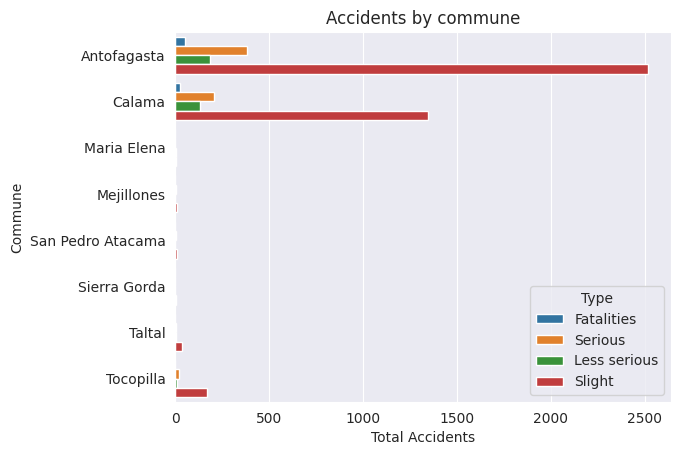

In [110]:
sns.barplot(df_total, x='Accidents', y='Commune', hue='Type')
plt.xlabel('Total Accidents')
plt.ylabel('Commune')
plt.title('Accidents by commune')

In [111]:
# Aqui lo que hago es crear una nueva columna 'Accidents' sumando todos los 'accidentes'
#gdfs_all['Accidents'] = gdfs_all['Fatalities']+	gdfs_all['Serious']+ gdfs_all['Less_serious']+ gdfs_all['Slight']

In [116]:
#gdfs_all.sample() # visualizo que la columna se haya creado

In [121]:
# Calcular accidentes por año
#accidents_for_year = df_total.groupby('Year')['Accidents'].sum().reset_index()

# Gráfico con la cantidad de accidentes en los años 2019, 2020, 2021 y 2022
#plt.figure(figsize=(10, 5))  # Ajustar el tamaño del gráfico si es necesario
#sns.lineplot(x='Year', y='Accidents', data=accidents_for_year, marker='o')
#plt.xlabel('Year')
#plt.ylabel('Number of accidents')
#plt.title('Accidents for year')
#plt.show()

### El gráfico es un poco mentiroso, porque comienza como en el 1000....quizás popodría ser mejor mostrarlo de otra manera....

In [122]:
# Se suman todos los tipos de accidentes por año
#gdfs_all.groupby('Year')[['Fatalities', 'Serious', 'Less_serious', 'Slight']].sum()

In [123]:
#acc_comumunes = gdfs_all.groupby('Commune')['Accidents'].sum()
#acc_comumunes

In [124]:
# se crea un gráfico con las comunas y la cantidad de accidentes
#plt.figure(figsize=(20, 10))
#sns.barplot(x=acc_comumunes.sort_values().values, y=acc_comumunes.sort_values().index, orient='h')
#plt.xlabel('Number de Accidents')
#plt.ylabel('Commune')
#plt.title('Accidents for Communne')
#plt.show()

## Analizando los datos se observa que la comuna de Antofagasta (capital regional) es la que concentra la mayor parte de los accidentes (indicar el nummero) , seguida por Calama (numero) y luego Tocopilla (numero)

In [125]:
#gdfs_all.groupby(['Commune', 'Year'])['Accidents'].sum().unstack().style.background_gradient()  # INDICAR DE DONDE SAQUÉ EL CODIGO

### Desagregando los accidentes por año, en el 2019 la mayoría se concentraron en la comuna de Puente Alto (812), seguido por Maipú (732). En el 2020, la cantidad de accidentes disminuyó a más de la mitad, siendo la comuna de Santiago la que concentró una mayor cantidad (384), en este año evidentemente la disminución se debe al efecto de la pandemia en la movildiad de las personas. En el año 2021, Santiago vuelve a tener el mayor registro de accidentes (497), seguido por Puente Alto (475). Mientras que en el año 2022, Puente Alto concentró la mayor cifra de accidentes (446), seguido por Providencia (318).

#Antofagasta

In [126]:
gdf_anto = gdfs_all[gdfs_all['Commune']== 'Antofagasta']

In [128]:
df_total_anto = gdf_anto.groupby('Year')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [129]:
df_total_anto.rename(columns={'level_0': 'Type',
                              0: 'Accidents'}, inplace=True)

In [130]:
df_total_anto['Year'] = df_total_anto['Year'].astype(str)

Text(0.5, 1.0, 'Accidents Antofagasta')

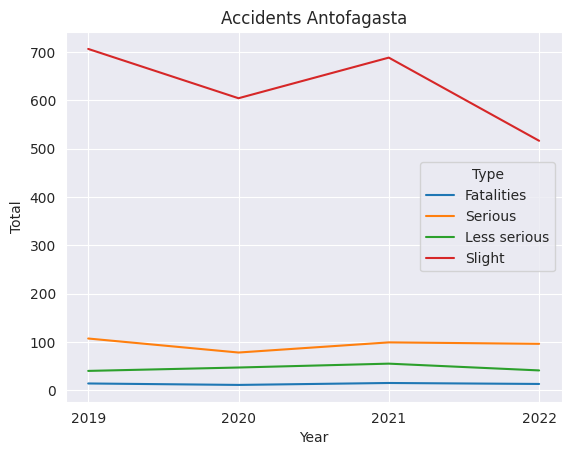

In [131]:
sns.lineplot(df_total_anto, x='Year', y='Accidents', hue='Type')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Accidents Antofagasta')

#Calama

In [132]:
gdf_calama = gdfs_all[gdfs_all['Commune']== 'Calama']

In [133]:
df_total_calama = gdf_calama.groupby('Year')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [134]:
df_total_calama.rename(columns={'level_0': 'Type',
                              0: 'Accidents'}, inplace=True)

In [135]:
df_total_calama['Year'] = df_total_calama['Year'].astype(str)

Text(0.5, 1.0, 'Accidents Calama')

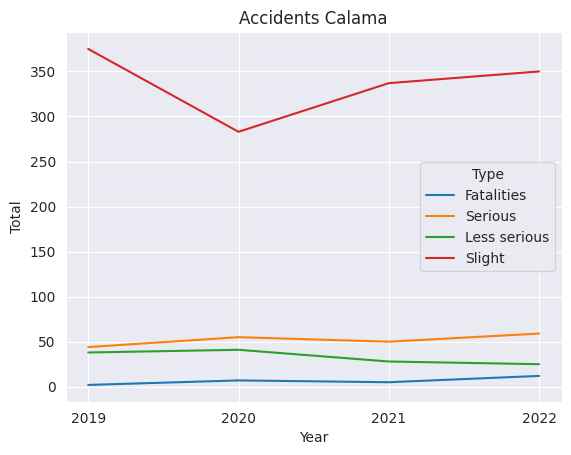

In [136]:
sns.lineplot(df_total_calama, x='Year', y='Accidents', hue='Type')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Accidents Calama')

In [ ]:
# creación de clusters
years = [2019, 2020, 2021, 2022]
gdfs_all = [gdfs_all[gdfs_all['Year'] == y] for y in years]
gdf_2019, gdf_2020, gdf_2021, gdf_2022 = gdfs_all

In [ ]:
# Ensure that the indices are unique before concatenating
#for gdf in [gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm]:
    #gdf.reset_index(drop=True, inplace=True)

In [ ]:
# Concatenate the GeoDataFrames into a single GeoDataFrame
#gdf_combined = gpd.GeoDataFrame(pd.concat([gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm], ignore_index=True))

# Print the resulting GeoDataFrame
#print(gdf_combined)

In [ ]:
# Verificar y renombrar columnas, seleccionar columnas específicas para cada GeoDataFrame
#gdfs_renamed = []
#for gdf in gdfs:
    # Verificar si las columnas a renombrar existen en el GeoDataFrame
    #missing_columns = [col for col in renames.keys() if col not in gdf.columns]
    #if missing_columns:
        #print(f"Columnas faltantes en el GeoDataFrame: {missing_columns}")
    #else:
        #gdf_renamed = gdf.rename(columns=renames)
        # Verificar si las columnas seleccionadas existen después de renombrar
        #missing_select_columns = [col for col in select if col not in gdf_renamed.columns]
        #if missing_select_columns:
            #print(f"Columnas seleccionadas faltantes después de renombrar: {missing_select_columns}")
        #else:
            #gdfs_renamed.append(gdf_renamed[select])


In [ ]:
# Asegurarse de que los índices sean únicos antes de concatenar
#for gdf in gdfs_renamed:
    #gdf.reset_index(drop=True, inplace=True)


In [ ]:
#gdfs_2022_utm.dtypes

In [ ]:
#gdfs_2019_utm.sample()

In [ ]:
#gdfs_2019_utm.info()

In [ ]:
# Concatenar los GeoDataFrames en un solo GeoDataFrame
#gdf = gpd.GeoDataFrame(pd.concat(gdfs_renamed, ignore_index=True))

## De aquí para abajo es el codigo de la clase 41 del diplomado (quiero replicar este análisis con los datos de Antofagasta)

In [ ]:
gdf.sample(12)

In [ ]:
#Identificar las comunas
comunas = np.sort(gdf['Comuna'].unique())
comunas

In [ ]:
# cambio de nombre columnas
df.replace({'PEÃ‘ALOLEN': 'PEÑALOLEN',
             'PENALOLEN': 'PEÑALOLEN',
             'PENAFLOR': 'PEÑAFLOR',
             'QUINTA NORMA': 'QUINTA NORMAL',
             'Ã‘UÃ‘OA': 'ÑUÑOA'}, inplace=True)

In [ ]:
# Calcular accidentes por año
accidentes_por_año = gdf.groupby('Año')['Accidentes'].sum().reset_index()

# Gráfico con la cantidad de accidentes en los años 2019, 2020, 2021 y 2022
plt.figure(figsize=(10, 5))  # Ajustar el tamaño del gráfico si es necesario
sns.lineplot(x='Año', y='Accidentes', data=accidentes_por_año, marker='o')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes por Año')
plt.show()

In [ ]:
gdf.groupby('Año')[['Fallecidos', 'Graves', 'Menos_Grav', 'Leves']].sum()

In [ ]:
acc_comunas = gdf.groupby('Comuna')['Accidentes'].sum()
acc_comunas

In [ ]:
# se crea un gráfico con las comunas y la cantidad de accidentes
plt.figure(figsize=(20, 10))
sns.barplot(x=acc_comunas.sort_values().values, y=acc_comunas.sort_values().index, orient='h')
plt.xlabel('Número de Accidentes')
plt.ylabel('Comuna')
plt.title('Accidentes por Comuna')
plt.show()

### Analizando la totalidad de los datos, las comunas de Punete Alto, Santiago y Providencia son las que registran la mayor cantidad de accidentes.

In [ ]:
gdf.groupby(['Comuna', 'Año'])['Accidentes'].sum().unstack().style.background_gradient()

### Desagregando los accidentes por año, en el 2019 la mayoría se concentraron en la comuna de Puente Alto (812), seguido por Maipú (732). En el 2020, la cantidad de accidentes disminuyó a más de la mitad, siendo la comuna de Santiago la que concentró una mayor cantidad (384), en este año evidentemente la disminución se debe al efecto de la pandemia en la movildiad de las personas. En el año 2021, Santiago vuelve a tener el mayor registro de accidentes (497), seguido por Puente Alto (475). Mientras que en el año 2022, Puente Alto concentró la mayor cifra de accidentes (446), seguido por Providencia (318).

In [ ]:
# creación de clusters
years = [2019, 2020, 2021, 2022]
gdfs = [gdf[gdf['Año'] == y] for y in years]
gdf_2019, gdf_2020, gdf_2021, gdf_2022 = gdfs

In [ ]:
# Se aplica el método del codo para definir el número óptimo de clusters para cada año. Para los cuatro años
# el número de clusters es 4.

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, gdf in enumerate(gdfs):
    x = gdf.get_coordinates()

    range_n_clusters = range(1, 15)
    inertias = []

    for n_clusters in range_n_clusters:
        modelo_kmeans = KMeans(
                            n_clusters   = n_clusters,
                            n_init       = 20,
                            random_state = 123
                        )
        modelo_kmeans.fit(x)
        inertias.append(modelo_kmeans.inertia_)

    axs[i].plot(range_n_clusters, inertias, marker='o')
    axs[i].set_title(years[i])
    axs[i].set_xlabel('Número clusters')
    axs[i].set_ylabel('Score')
    axs[i].axvline(4, color='k', ls="dotted");


In [ ]:
# Se calcula el modelo K-means, integrando lo obtenido al aplicar el método del codo (4 clusters)
clusters = []
for i, gdf in enumerate(gdfs):
    x = gdf.get_coordinates()

    modelo = KMeans(n_clusters=4)
    y_kmeans = modelo.fit_predict(x)

    clusters.append(y_kmeans)
    print(len(y_kmeans))